# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\ASUS\.conda\envs\ml\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Eksplorasi Data Analysis

## Analisis Perusahaannya

In [2]:
df_m6 = pd.read_csv('M6_Universe.csv')
print('Ukuran Shape',df_m6.shape)
df_m6.head()

Ukuran Shape (100, 6)


,id,class,symbol,name,GICS_sector/ETF_type,GICS_industry/ETF_subtype
0,1,Stock,ABBV,AbbVie,Health Care,Pharmaceuticals
1,2,Stock,ACN,Accenture,Information Technology,IT Consulting & Other Services
2,3,Stock,AEP,American Electric Power,Utilities,Electric Utilities
3,4,Stock,AIZ,Assurant,Financials,Multi-line Insurance
4,5,Stock,ALLE,Allegion,Industrials,Building Products


In [3]:
for i in df_m6.columns:
    panjang_unique = len(df_m6[i].unique())
    if(panjang_unique < df_m6.shape[0]):
        print(i,len(df_m6[i].unique()),df_m6[i].unique())

class 2 ['Stock' 'ETF']
GICS_sector/ETF_type 15 ['Health Care' 'Information Technology' 'Utilities' 'Financials'
 'Industrials' 'Consumer Discretionary' 'Real Estate' 'Materials'
 'Consumer Staples' 'Communication Services' 'Energy' 'Equities'
 'Fixed Income' 'Commodities' 'Volatility']
GICS_industry/ETF_subtype 60 ['Pharmaceuticals' 'IT Consulting & Other Services' 'Electric Utilities'
 'Multi-line Insurance' 'Building Products' 'Semiconductor Equipment'
 'Asset Management & Custody Banks' 'Internet & Direct Marketing Retail'
 'Residential REITs' 'Paper Packaging' 'Consumer Finance'
 'Health Care Equipment' 'Distillers & Vintners'
 'Health Care Distributors' 'Data Processing & Outsourced Services'
 'Technology Distributors' 'Specialty Chemicals' 'Cable & Satellite'
 'Managed Health Care' 'Multi-Utilities'
 'Oil & Gas Exploration & Production' 'Diversified Support Services'
 'Casinos & Gaming' 'General Merchandise Stores' 'Restaurants'
 'Industrial REITs' 'Interactive Media & Services'

<AxesSubplot: xlabel='class', ylabel='count'>

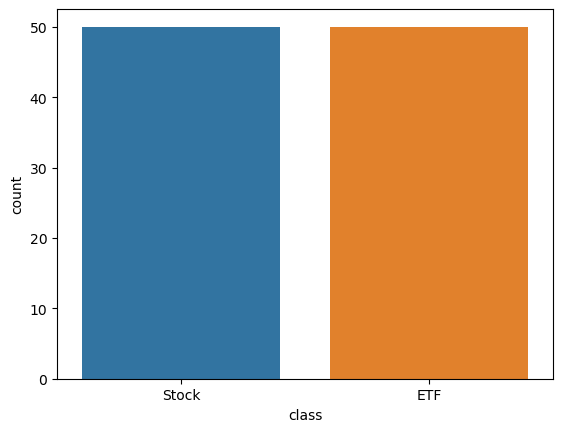

In [4]:
sns.countplot(x='class',data=df_m6)

## Analisis Harganya

In [5]:
df_price = pd.read_csv('assets_m6.csv')
print(df_price.head())
print('shape',df_price.shape)

  symbol        date    price
0   ABBV  2022/01/31  133.124
1    ACN  2022/01/31  349.726
2    AEP  2022/01/31   87.403
3    AIZ  2022/01/31  149.851
4   ALLE  2022/01/31  121.261
shape (20999, 3)


In [6]:
print('minimum',min(df_price.date.astype('datetime64')))
print('maximum',max(df_price.date.astype('datetime64')))

minimum 2022-01-31 00:00:00
maximum 2022-11-29 00:00:00


In [7]:
urutan_tanggal = np.arange(min(df_price.date.astype('datetime64')),max(df_price.date.astype('datetime64')) + np.timedelta64(1,'D'),dtype='datetime64[D]')
urutan_tanggal.shape

(303,)

In [8]:
kolom_tanggal = np.array(list(map(lambda x : x.replace('/','-'), df_price.date.unique())),dtype='datetime64[D]')
kolom_tanggal.shape

(216,)

In [9]:
tanggal_kosong = np.setdiff1d(urutan_tanggal,kolom_tanggal)
tanggal_kosong = tanggal_kosong.astype('str')
tanggal_kosong = np.array(list(map(lambda x : x.replace('-','/'),tanggal_kosong)))
tanggal_kosong

array(['2022/02/05', '2022/02/06', '2022/02/12', '2022/02/13',
       '2022/02/19', '2022/02/20', '2022/02/26', '2022/02/27',
       '2022/03/05', '2022/03/06', '2022/03/12', '2022/03/13',
       '2022/03/19', '2022/03/20', '2022/03/26', '2022/03/27',
       '2022/04/02', '2022/04/03', '2022/04/09', '2022/04/10',
       '2022/04/15', '2022/04/16', '2022/04/17', '2022/04/23',
       '2022/04/24', '2022/04/30', '2022/05/01', '2022/05/07',
       '2022/05/08', '2022/05/14', '2022/05/15', '2022/05/21',
       '2022/05/22', '2022/05/28', '2022/05/29', '2022/06/04',
       '2022/06/05', '2022/06/11', '2022/06/12', '2022/06/18',
       '2022/06/19', '2022/06/25', '2022/06/26', '2022/07/02',
       '2022/07/03', '2022/07/09', '2022/07/10', '2022/07/16',
       '2022/07/17', '2022/07/23', '2022/07/24', '2022/07/30',
       '2022/07/31', '2022/08/06', '2022/08/07', '2022/08/13',
       '2022/08/14', '2022/08/20', '2022/08/21', '2022/08/27',
       '2022/08/28', '2022/09/03', '2022/09/04', '2022/

In [10]:
df_price

,symbol,date,price
0,ABBV,2022/01/31,133.124
1,ACN,2022/01/31,349.726
2,AEP,2022/01/31,87.403
3,AIZ,2022/01/31,149.851
4,ALLE,2022/01/31,121.261
...,...,...,...
20994,XLP,2022/11/29,75.670
20995,XLU,2022/11/29,69.690
20996,XLV,2022/11/29,135.780
20997,XLY,2022/11/29,141.300


In [11]:
df_price_wide = pd.pivot(df_price,index='symbol',columns='date',values='price')
df_price_wide

date,2022/01/31,2022/02/01,2022/02/02,2022/02/03,2022/02/04,2022/02/07,2022/02/08,2022/02/09,2022/02/10,2022/02/11,...,2022/11/16,2022/11/17,2022/11/18,2022/11/21,2022/11/22,2022/11/23,2022/11/24,2022/11/25,2022/11/28,2022/11/29
symbol,,,,,,,,,,,,,,,,,,,,,
ABBV,133.124,133.231,134.806,136.858,136.780,138.609,139.562,139.260,138.784,138.103,...,151.870,152.16,154.980,157.110,159.790,159.39,NaN,159.62,158.43,158.20
ACN,349.726,349.567,355.551,341.783,343.712,340.210,341.308,351.654,338.658,325.592,...,291.510,287.14,286.500,287.020,292.890,294.53,NaN,296.40,290.60,287.98
AEP,87.403,85.421,86.901,87.200,86.214,86.833,87.210,87.171,85.230,85.484,...,89.740,89.07,91.280,93.150,93.710,95.13,NaN,95.47,95.22,94.65
AIZ,149.851,148.613,150.323,149.154,150.401,150.077,153.320,163.656,159.736,159.107,...,125.067,122.78,124.262,125.803,126.479,126.34,NaN,128.49,125.22,126.39
ALLE,121.261,118.563,118.741,114.720,117.822,119.018,120.263,123.681,119.245,117.447,...,111.050,110.77,112.960,112.660,113.940,113.99,NaN,114.32,112.25,110.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XLP,74.589,74.521,75.414,75.434,74.511,74.648,74.933,74.953,74.148,73.882,...,73.910,73.89,74.680,75.390,75.940,76.20,NaN,76.25,75.96,75.67
XLU,67.791,66.890,67.879,67.575,67.037,66.939,66.988,67.282,65.578,65.618,...,68.620,67.42,68.850,69.160,69.750,70.53,NaN,70.94,70.21,69.69
XLV,129.767,130.113,131.863,131.299,130.824,130.597,131.665,132.684,130.607,128.797,...,133.020,132.96,134.570,134.630,135.800,136.34,NaN,137.15,136.12,135.78


In [12]:
for i in tanggal_kosong:
    df_price_wide[i] = np.NaN

In [13]:
df_price_wide = df_price_wide[sorted(df_price_wide.columns.tolist())]

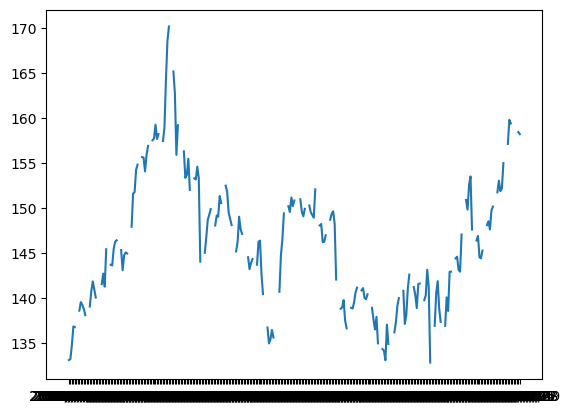

In [14]:
plt.plot(df_price_wide.loc['ABBV',])

In [15]:
df_price_wide

date,2022/01/31,2022/02/01,2022/02/02,2022/02/03,2022/02/04,2022/02/05,2022/02/06,2022/02/07,2022/02/08,2022/02/09,...,2022/11/20,2022/11/21,2022/11/22,2022/11/23,2022/11/24,2022/11/25,2022/11/26,2022/11/27,2022/11/28,2022/11/29
symbol,,,,,,,,,,,,,,,,,,,,,
ABBV,133.124,133.231,134.806,136.858,136.780,NaN,NaN,138.609,139.562,139.260,...,NaN,157.110,159.790,159.39,NaN,159.62,NaN,NaN,158.43,158.20
ACN,349.726,349.567,355.551,341.783,343.712,NaN,NaN,340.210,341.308,351.654,...,NaN,287.020,292.890,294.53,NaN,296.40,NaN,NaN,290.60,287.98
AEP,87.403,85.421,86.901,87.200,86.214,NaN,NaN,86.833,87.210,87.171,...,NaN,93.150,93.710,95.13,NaN,95.47,NaN,NaN,95.22,94.65
AIZ,149.851,148.613,150.323,149.154,150.401,NaN,NaN,150.077,153.320,163.656,...,NaN,125.803,126.479,126.34,NaN,128.49,NaN,NaN,125.22,126.39
ALLE,121.261,118.563,118.741,114.720,117.822,NaN,NaN,119.018,120.263,123.681,...,NaN,112.660,113.940,113.99,NaN,114.32,NaN,NaN,112.25,110.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XLP,74.589,74.521,75.414,75.434,74.511,NaN,NaN,74.648,74.933,74.953,...,NaN,75.390,75.940,76.20,NaN,76.25,NaN,NaN,75.96,75.67
XLU,67.791,66.890,67.879,67.575,67.037,NaN,NaN,66.939,66.988,67.282,...,NaN,69.160,69.750,70.53,NaN,70.94,NaN,NaN,70.21,69.69
XLV,129.767,130.113,131.863,131.299,130.824,NaN,NaN,130.597,131.665,132.684,...,NaN,134.630,135.800,136.34,NaN,137.15,NaN,NaN,136.12,135.78


In [16]:
import plotly.express as px
import plotly.graph_objects as pog
import calendar

grafiknya = pog.Figure()

tanggal = np.array(pd.to_datetime(df_price_wide.columns.to_numpy()).to_numpy(),dtype=np.datetime64)

selector = 100*[False]
button_all = []
sel_num = 0



for i in df_price_wide.index:
    grafiknya.add_trace(
        pog.Line(x=tanggal,y=df_price_wide.loc[i,],name=i)
    )
    
    selector[sel_num] = True
    hasilku = selector
    button_1 = dict(
        label = i,
        method="update",
        args=[
            {"visible":selector[:100]},
            {'title':{'text':'Grafik Harga Saham '+ i}}
        ]
    )
    selector[sel_num] = False
    sel_num += 1
    button_all.append(button_1)

kamus = dict(
    label="All",
    method="update",
    args=[
            {"visible":100*[True]},
            {'title':{'text':'Grafik Harga Saham Seluruhnya'}}
        ]
)

button_all.insert(0,kamus)


grafiknya.update_layout(
    updatemenus=[
        dict(
            buttons = list(
                button_all
            ),
            direction="down",
            pad={"r": 20, "t": 10},
            showactive=True
        )
    ]
)
grafiknya.show()
# print(calendar.calendar(2022))


c:\Users\ASUS\.conda\envs\ml\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




                                  2022

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
                1  2          1  2  3  4  5  6          1  2  3  4  5  6
 3  4  5  6  7  8  9       7  8  9 10 11 12 13       7  8  9 10 11 12 13
10 11 12 13 14 15 16      14 15 16 17 18 19 20      14 15 16 17 18 19 20
17 18 19 20 21 22 23      21 22 23 24 25 26 27      21 22 23 24 25 26 27
24 25 26 27 28 29 30      28                        28 29 30 31
31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
             1  2  3                         1             1  2  3  4  5
 4  5  6  7  8  9 10       2  3  4  5  6  7  8       6  7  8  9 10 11 12
11 12 13 14 15 16 17       9 10 11 12 13 14 15      13 14 15 16 17 18 19
18 19 20 21 22 23 24      16 17 18 19 20 21 22      20 21 22 23 24 25 26
25 26 27 28 29 30         23 24 

In [17]:
import pandas as pd
from datetime import date
import holidays
from workalendar.europe import Germany

In [18]:
for holiday in holidays.UnitedStates(years=2022).items():
    print(holiday)

(datetime.date(2022, 1, 1), "New Year's Day")
(datetime.date(2022, 1, 17), 'Martin Luther King Jr. Day')
(datetime.date(2022, 2, 21), "Washington's Birthday")
(datetime.date(2022, 5, 30), 'Memorial Day')
(datetime.date(2022, 6, 19), 'Juneteenth National Independence Day')
(datetime.date(2022, 6, 20), 'Juneteenth National Independence Day (Observed)')
(datetime.date(2022, 7, 4), 'Independence Day')
(datetime.date(2022, 9, 5), 'Labor Day')
(datetime.date(2022, 10, 10), 'Columbus Day')
(datetime.date(2022, 11, 11), 'Veterans Day')
(datetime.date(2022, 11, 24), 'Thanksgiving')
(datetime.date(2022, 12, 25), 'Christmas Day')
(datetime.date(2022, 12, 26), 'Christmas Day (Observed)')


In [19]:
import plotly.express as px
px.line(x=tanggal,y=df_price_wide.mean(),title="Grafik rata rata seluruh saham")